In [1]:
## Load libraries
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('dark_background')
%matplotlib inline
from PIL import Image

import tensorflow as tf
tf.__version__

'2.15.0'

In [2]:
np.set_printoptions(precision=2)

---

Mount Google drive

---

In [8]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    # Change path below starting from /content/drive/MyDrive/Colab Notebooks/
    # depending on how data is organized inside your Colab Notebooks folder in
    # Google Drive
    DIR = '/content/drive/MyDrive/Learning/Data Science/Deep Learning/OneDrive-2024-04-01'
    DATA_DIR = DIR+'/Data/'
else:
    DATA_DIR = 'Data/'



Mounted at /content/drive


---

**Load image**

<img src = 'https://drive.google.com/uc?id=1ZpG6qRKG-Ry9poVjvgJTtryOiFNwPWSI' width = '400'>

---

(337, 600)

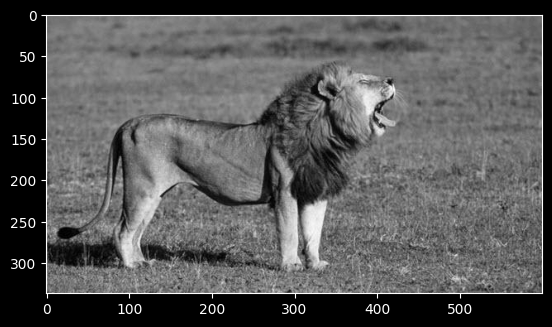

In [9]:
## Read image
FILENAME = DATA_DIR + 'lion_grayscale.jpg'
# Read image
img = Image.open(FILENAME)
plt.imshow(img, cmap = 'gray')
X = np.array(img)/1.0
X.shape

---

Define filters (also kernels because channel depth is 1 for a gray scale image)

---

In [10]:
W_smoothen = np.array([[
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
    ]])
print(W_smoothen.shape)
W_smoothen = np.transpose(W_smoothen, (1, 2, 0))
print(W_smoothen.shape)

(1, 3, 3)
(3, 3, 1)


In [11]:
W_sharpen = np.array([[
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
    ]])
print(W_sharpen.shape)
W = np.transpose(W_sharpen, (1, 2, 0))
print(W_sharpen.shape)

(1, 3, 3)
(1, 3, 3)


In [12]:
W_vertical_edge = np.array([[
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
    ]])
print(W_vertical_edge.shape)
W_vertical_edge = np.transpose(W_vertical_edge, (1, 2, 0))
print(W_vertical_edge.shape)

(1, 3, 3)
(3, 3, 1)


In [13]:
W_horizontal_edge = np.array([[
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
    ]])
print(W_horizontal_edge.shape)
W_horizontal_edge = np.transpose(W_horizontal_edge, (1, 2, 0))
print(W_horizontal_edge.shape)

(1, 3, 3)
(3, 3, 1)


In [14]:
W_gaussian = np.array([[
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]
    ]])
print(W_gaussian.shape)
W_gaussian = np.transpose(W_gaussian, (1, 2, 0))
print(W_gaussian.shape)

(1, 3, 3)
(3, 3, 1)


---

Define convolution layer and initialize the kernel

---

In [15]:
layer = tf.keras.layers.Conv2D(
        filters = 1,
        kernel_size = [3, 3],
        strides = (1, 1),
        padding = 'same',
        kernel_initializer = tf.constant_initializer(W_vertical_edge)
    )

---

Apply convolution layer and plot resulting output

---

input shape = (1, 337, 600, 1)
output shape = (1, 337, 600, 1)


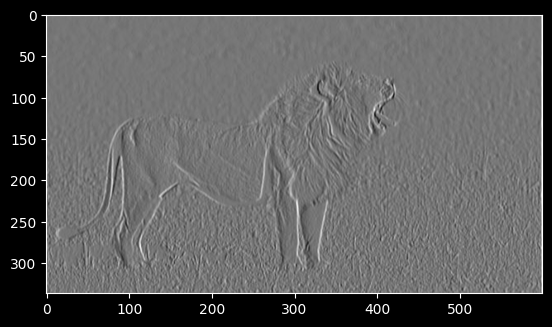

In [16]:
print(f'input shape = {np.expand_dims(X, axis = (0, -1)).shape}')
output = layer(np.expand_dims(X, axis = (0, -1)))
print(f'output shape = {output.shape}')

# Squeeze and plot the output
plt.imshow(tf.squeeze(output), cmap = 'gray');

---

In the following code segments, you will show that a convolution neuron learns about an input sample
1. channel-by-channel;
2. locally through the convolution operation.

The raw scores map $\mathbf{WX}$ calcuated by a single convolution neuron for a 3-channel input $\mathbf{X}$ is equal to $$\underbrace{\mathbf{W}_1}_{\text{kernel for channel-1}}\circledast\underbrace{\mathbf{X}_1}_\text{channel-1}+\underbrace{\mathbf{W}_2}_{\text{kernel for channel-2}}\circledast\underbrace{\mathbf{X}_2}_\text{channel-2}+\underbrace{\mathbf{W}_3}_{\text{kernel for channel-3}}\circledast\underbrace{\mathbf{X}_3}_\text{channel-3} +\underbrace{\mathbf{b}}_\text{bias of appropriate shape}.$$

---

In [17]:
# An input image of shape 3 x 5 x 5 (channels x height x width)
X = tf.constant([
    [[0., 2, 0, 2, 1],
     [1, 1, 2, 0, 2],
     [0, 1, 0, 0, 1],
     [0, 2, 1, 2, 0],
     [2, 0, 0, 0, 2]
     ],
    [[2, 1, 0, 0, 1],
     [2, 2, 0, 2, 1],
     [0, 0, 0, 2, 0],
     [2, 2, 2, 0, 1],
     [0, 0, 1, 0, 2]],
    [[1, 2, 0, 0, 2],
     [2, 1, 1, 0, 1],
     [1, 2, 1, 0, 2],
     [0, 2, 1, 0, 1],
     [2, 2, 0, 1, 0]]
])
print(f'Original shape of X with channel as 0th axis = {X.shape}')

# Reshape input image into order (height x width x channels)
X = tf.transpose(X, (1, 2, 0))
print(f'Shape of X with channel as last axis = {X.shape}')

# Filter of shape 3 x 3 x 3 (kernels x height x width)
W = tf.constant([
    [[0., -1., -1],
     [0, 0, 0.],
     [-1, -1, -1]],
    [[1, 0, 1],
     [1., -1, -1],
     [1., 1., 0.]],
    [[1, -1, 0.],
     [-1, -1., 1],
     [0, 1., -1]]
]).numpy()
print(f'Shape of filter with kernels as the 0th axis = {W.shape}')

# Reshape kernels into order (height x width x kernels)
W = tf.transpose(W, (1, 2, 0)).numpy()
print(f'Shape of filter with kernels as the last (-1th) axis = {W.shape}')

# bias value for the filter
b = 1

Original shape of X with channel as 0th axis = (3, 5, 5)
Shape of X with channel as last axis = (5, 5, 3)
Shape of filter with kernels as the 0th axis = (3, 3, 3)
Shape of filter with kernels as the last (-1th) axis = (3, 3, 3)


---

Calculate raw score map as $$\underbrace{\mathbf{W}}_{\text{kernels for all input channels}}\mathbf{X}+\underbrace{\mathbf{b}}_\text{bias of appropriate shape}$$ with a single convolution layer corresponding to a filter with 3 kernels and a bias. Use unit padding and stride = 2.

---

In [18]:
## Define convolution layer
layer = tf.keras.layers.Conv2D(
        filters = 1,
        kernel_size = [3, 3],
        strides=(2, 2),
        padding = 'same',
        kernel_initializer = tf.constant_initializer(W),
        bias_initializer = tf.constant_initializer(b)
        )
# Apply convolution to the input sample to get the raw scores map
output = layer(np.expand_dims(X, axis = 0))
print(f'Original input shape: {np.expand_dims(X, axis = 0).shape}')
print(f'Original output shape: {output.shape}')
print(f'Squeezed output shape: {tf.squeeze(output).shape}')
print(f'Squeezed output:\n {tf.squeeze(output)}')

Original input shape: (1, 5, 5, 3)
Original output shape: (1, 3, 3, 1)
Squeezed output shape: (3, 3)
Squeezed output:
 [[ 0.  0.  0.]
 [-2. -2.  0.]
 [ 1. -1. -3.]]


---

Calculate raw scores map $\mathbf{WX}+\mathbf{b}$ as $$\underbrace{\mathbf{W}_1}_{\text{kernel for channel-1}}\circledast\underbrace{\mathbf{X}_1}_\text{channel-1}+\underbrace{\mathbf{W}_2}_{\text{kernel for channel-2}}\circledast\underbrace{\mathbf{X}_2}_\text{channel-2}+\underbrace{\mathbf{W}_3}_{\text{kernel for channel-3}}\circledast\underbrace{\mathbf{X}_3}_\text{channel-3} +\underbrace{\mathbf{b}}_\text{bias of appropriate shape}$$ using a depthwise convolution layer corresponding to a filter with 3 kernels and a bias. Use unit padding and stride = 2.

---

In [19]:
## Define depthwise convolution layer
layer_depthwise = tf.keras.layers.DepthwiseConv2D(
        kernel_size = [3, 3],
        strides=(2, 2),
        padding = 'same',
        depthwise_initializer = tf.constant_initializer(W)
    )
# Apply depthwise convolution to the input sample and add bias
# to get the raw scores map
output = layer_depthwise(np.expand_dims(X, axis = 0))

print(f'Original input shape: {np.expand_dims(X, axis = 0).shape}')
print(f'Original output shape: {output.shape}')

print(f'Convolution applied to channel-0 results in: \n {tf.squeeze(output[:, :, :, 0])}')
print(f'Convolution applied to channel-1 results in: \n {tf.squeeze(output[:, :, :, 1])}')
print(f'Convolution applied to channel-2 results in: \n {tf.squeeze(output[:, :, :, 2])}')

# Adding the convolutions across each channel gives the full convolution output
# volume which is the raw score map calculated by the neuron.
print(f'The full convolution output volume is the sum of all channel convolutions plus the bias:\n')
# Both of the following do the same
print(tf.squeeze(output[:, :, :, 0] + output[:, :, :, 1] + output[:, :, :, 2]) + b)
print(tf.reduce_sum(tf.squeeze(output), axis = -1) + b)

Original input shape: (1, 5, 5, 3)
Original output shape: (1, 3, 3, 3)
Convolution applied to channel-0 results in: 
 [[-2. -3. -2.]
 [-4. -7. -4.]
 [-2. -3.  0.]]
Convolution applied to channel-1 results in: 
 [[-1.  3.  2.]
 [ 4.  6.  5.]
 [ 2.  1. -2.]]
Convolution applied to channel-2 results in: 
 [[ 2. -1. -1.]
 [-3. -2. -2.]
 [ 0.  0. -2.]]
The full convolution output volume is the sum of all channel convolutions plus the bias:

tf.Tensor(
[[ 0.  0.  0.]
 [-2. -2.  0.]
 [ 1. -1. -3.]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[ 0.  0.  0.]
 [-2. -2.  0.]
 [ 1. -1. -3.]], shape=(3, 3), dtype=float32)


---

Calculate raw scores map $\mathbf{WX}$ as $$\underbrace{\mathbf{W}_1}_{\text{kernel for channel-1}}\circledast\underbrace{\mathbf{X}_1}_\text{channel-1}+\underbrace{\mathbf{W}_2}_{\text{kernel for channel-2}}\circledast\underbrace{\mathbf{X}_2}_\text{channel-2}+\underbrace{\mathbf{W}_3}_{\text{kernel for channel-3}}\circledast\underbrace{\mathbf{X}_3}_\text{channel-3} +\underbrace{\mathbf{b}}_\text{bias of appropriate shape}$$ using separate convolution layers for each channel and adding their output with the bias. Use unit padding and stride = 2.

This approach is equivalent to performing the depth-wise convolution channel by channel, and then adding the results.

---

In [20]:
## Define channel-wise convolution layers
layer_channel0 = tf.keras.layers.Conv2D(
        filters = 1,
        kernel_size = [3, 3],
        strides=(2, 2),
        padding = 'same',
        kernel_initializer = tf.constant_initializer(np.expand_dims(W[:, :, 0], axis = 0))
        )

layer_channel1 = tf.keras.layers.Conv2D(
        filters = 1,
        kernel_size = [3, 3],
        strides=(2, 2),
        padding = 'same',
        kernel_initializer = tf.constant_initializer(np.expand_dims(W[:, :, 1], axis = 0))
        )

layer_channel2 = tf.keras.layers.Conv2D(
        filters = 1,
        kernel_size = [3, 3],
        strides=(2, 2),
        padding = 'same',
        kernel_initializer = tf.constant_initializer(np.expand_dims(W[:, :, 2], axis = 0))
        )

In [21]:
## Perform channel-wise convolution and add with bias to get the
## raw scores map calculated by the neuron.
output0 = layer_channel0(np.expand_dims(X[:, :, 0], axis = (0, -1)))
output1 = layer_channel1(np.expand_dims(X[:, :, 1], axis = (0, -1)))
output2 = layer_channel2(np.expand_dims(X[:, :, 2], axis = (0, -1)))
output = output0 + output1 + output2 + b

print(f'Convolution applied to channel-0 results in: \n {tf.squeeze(output0[:, :, :, 0])}')
print(f'Convolution applied to channel-1 results in: \n {tf.squeeze(output1[:, :, :, 0])}')
print(f'Convolution applied to channel-2 results in: \n {tf.squeeze(output2[:, :, :, 0])}')
# Adding the convolutions across each channel gives the full convolution output
# volume which is the raw score map calculated by the neuron.
print(f'The full convolution output volume is the sum of all channel convolutions:\n {tf.squeeze(output)}')

Convolution applied to channel-0 results in: 
 [[-2. -3. -2.]
 [-4. -7. -4.]
 [-2. -3.  0.]]
Convolution applied to channel-1 results in: 
 [[-1.  3.  2.]
 [ 4.  6.  5.]
 [ 2.  1. -2.]]
Convolution applied to channel-2 results in: 
 [[ 2. -1. -1.]
 [-3. -2. -2.]
 [ 0.  0. -2.]]
The full convolution output volume is the sum of all channel convolutions:
 [[ 0.  0.  0.]
 [-2. -2.  0.]
 [ 1. -1. -3.]]


---

Define max-pooling layer.

---

In [22]:
tf.squeeze(output)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.,  0.,  0.],
       [-2., -2.,  0.],
       [ 1., -1., -3.]], dtype=float32)>

In [23]:
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                           strides = (1, 1),
                                           padding='valid')

---

Apply max-pooling to the output of the convolution layer

---

In [24]:
tf.squeeze(max_pool_2d(output))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [1., 0.]], dtype=float32)>

---

Load MNIST dataset.

Note that in TensorFlow, a typical representation of an image data set is a four-dimensional tensor with axes meanings [number of images, width, height, number of color channels]. In the MNIST dataset, we are reading grayscale images of shape 28 x 28 with only one color channel (a regular RGB color image has 3 color channels). So, we use np.expand_dims() to manually add the last dimension for the image data.

---

In [25]:
# Load MNIST dataset and adjust shape
## Load MNIST data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_train, axis = -1)

num_labels = len(np.unique(y_train))

# One-hot encode class labels
Y_train = tf.keras.utils.to_categorical(y_train)
Y_test = tf.keras.utils.to_categorical(y_test)

# Normalize the samples (images) using the training data
xmax = np.amax(X_train)
xmin = np.amin(X_train)
X_train = (X_train - xmin) / (xmax - xmin) # all train features turn into a number between 0 and 1
X_test = (X_test - xmin)/(xmax - xmin)

11490434/11490434 [==============================] - 0s 0us/step


In [26]:
## Create source dataset from input data (this is helpful for pipelining later)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
batch_size = 100 # batch size
# Create training batches
train_dataset = train_dataset.shuffle(buffer_size = 1024).batch(batch_size)

---

Define CNN Model

---

In [27]:
class CNN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(
            filters = 32,
            kernel_size = [5, 5],
            padding = 'same',
            activation = tf.nn.relu
        )
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size = [2, 2], strides = 2)
        self.conv2 = tf.keras.layers.Conv2D(
            filters = 64,
            kernel_size = [5, 5],
            padding = 'same',
            activation = tf.nn.relu
        )
        self.pool2 = tf.keras.layers.MaxPool2D(pool_size = [2, 2], strides = 2)
        self.flatten = tf.keras.layers.Reshape(target_shape=(7 * 7 * 64,))
        self.dense1 = tf.keras.layers.Dense(units=1024, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(units=10)

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        output = tf.nn.softmax(x)
        return output

---

Build and train CNN model

---

In [28]:
# Create CNN model
model = CNN()

opt = tf.keras.optimizers.Adam(learning_rate = 1e-03) # optimizer
loss_fn = tf.keras.losses.CategoricalCrossentropy()  # loss function

# Varible to store training loss per epoch
loss_train_epoch = tf.keras.metrics.Mean()

# Iterate over epochs
nepochs = 10
for epoch in range(nepochs):
  # Iterate over the batches of the dataset.
  for step, train_batch in enumerate(train_dataset):
    with tf.GradientTape() as g:
      # Compute loss
      yhat = model(train_batch[0])
      loss = loss_fn(train_batch[1], yhat)

    # Calculate gradients
    grad = g.gradient(loss, model.trainable_weights)

    # Update model
    opt.apply_gradients(zip(grad, model.trainable_weights))

    # Append training loss
    loss_train_epoch(loss)
  print('Epoch %d: train loss = %f'%(epoch+1, loss_train_epoch.result()))

Epoch 1: train loss = 0.119111
Epoch 2: train loss = 0.078350
Epoch 3: train loss = 0.060357
Epoch 4: train loss = 0.049486
Epoch 5: train loss = 0.042320
Epoch 6: train loss = 0.037048
Epoch 7: train loss = 0.033174
Epoch 8: train loss = 0.030020
Epoch 9: train loss = 0.027464
Epoch 10: train loss = 0.025462


---

Compile model so it can be evaluated for test set

---

In [29]:
# Compile model so it can be evaluated for test set
model.compile(optimizer = opt, loss = loss_fn, metrics = ['acc'])
print('\nAccuracy:', model.evaluate(X_test, Y_test, verbose=0)[1])

ValueError: Data cardinality is ambiguous:
  x sizes: 60000
  y sizes: 10000
Make sure all arrays contain the same number of samples.